In [14]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
path = os.path.join(os.getcwd(),'online_retail_II','Year 2009-2010-Table 1.csv')
filepath =os.path.join(os.getcwd(), 'online_retail_II', 'Year 2010-2011-Table 1.csv')

data = pd.read_csv(path, parse_dates=['InvoiceDate'])
data2 = pd.read_csv(filepath, parse_dates=['InvoiceDate'])

print(data.info())
print(data2.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      541910 non-null  object        
 1   StockCode    541910 non-null  object  

In [7]:
data.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [8]:
data2.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536368,22960,JAM MAKING SET WITH JARS,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom


In [10]:
df = pd.concat([data, data2])

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [17]:
#question 1 How is average sales value in different countries?
country_sales = df.groupby('Country')['Price'].mean()

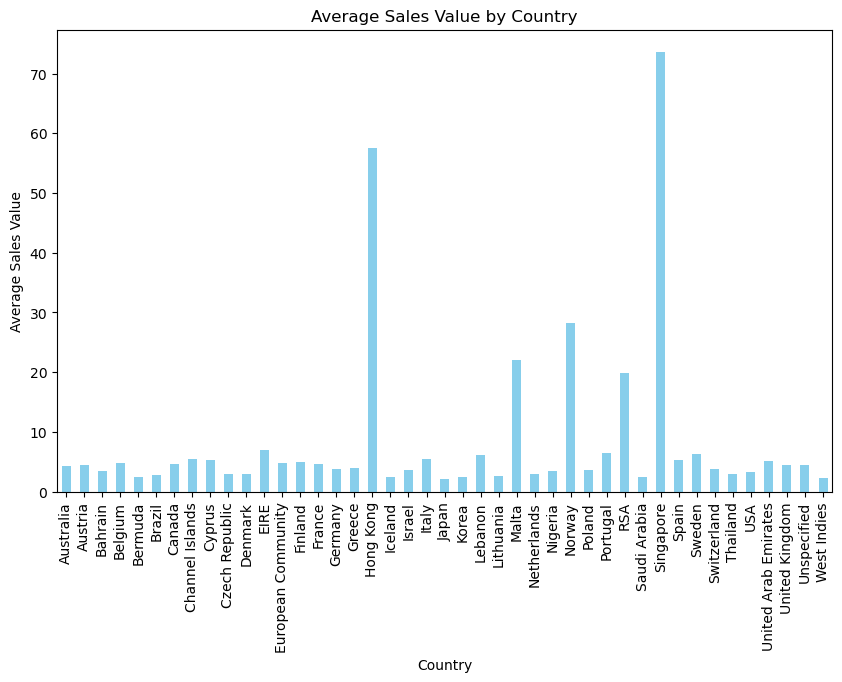

In [19]:
country_sales.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Average Sales Value by Country')
plt.xlabel('Country')
plt.ylabel('Average Sales Value')
plt.show()

In [45]:
#question 2
# Calculate total sales for each product
product_sales = df.groupby('Description')['Quantity'].sum()

# Find the top 10 best-selling products
top10_products = product_sales.nlargest(10).index

# Select the information of the top 10 sales products
top10_data = df[df['Description'].isin(top10_products)]


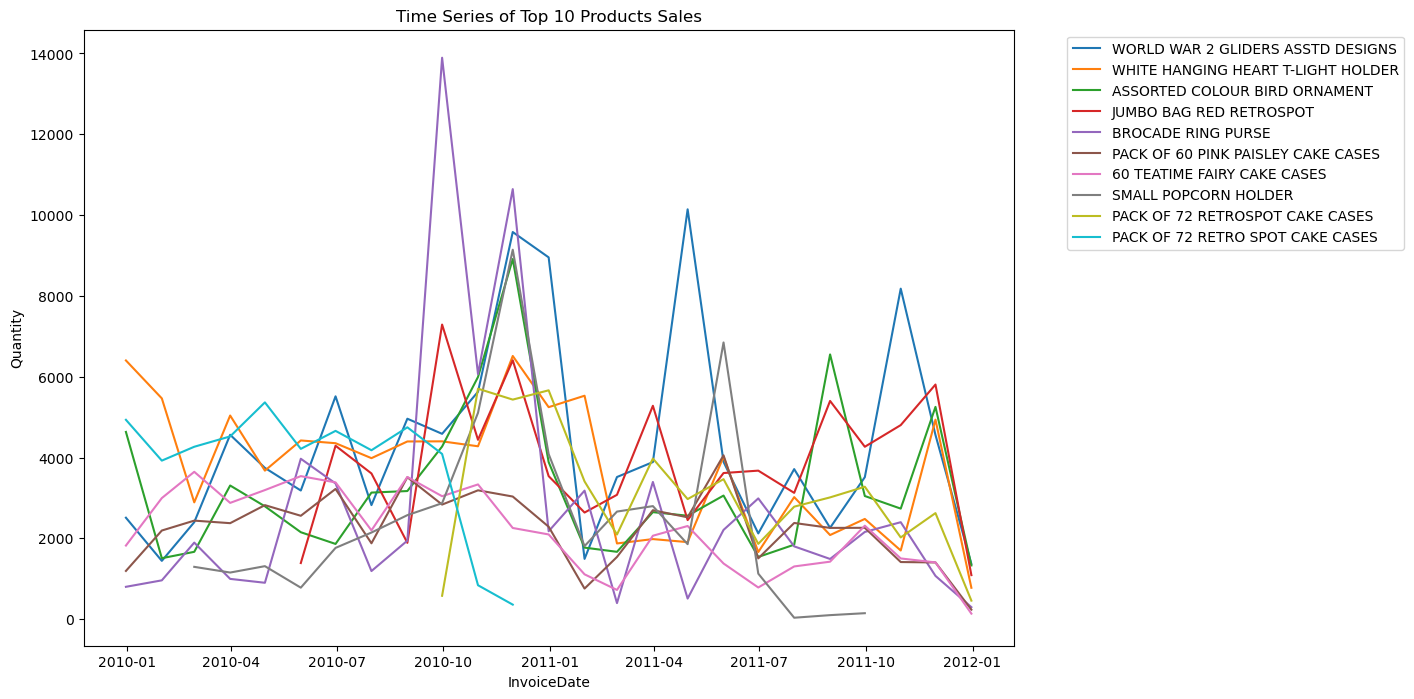

In [46]:
# plot time series
fig, ax = plt.subplots(figsize=(12, 8))

for product in top10_products:
    product_data = top10_data[top10_data['Description'] == product].groupby(pd.Grouper(key='InvoiceDate', freq='M'))['Quantity'].sum()
    ax.plot(product_data.index, product_data.values, label=product)

# # Set plot labels and title
ax.set_xlabel('InvoiceDate')
ax.set_ylabel('Quantity')
ax.set_title('Time Series of Top 10 Products Sales')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

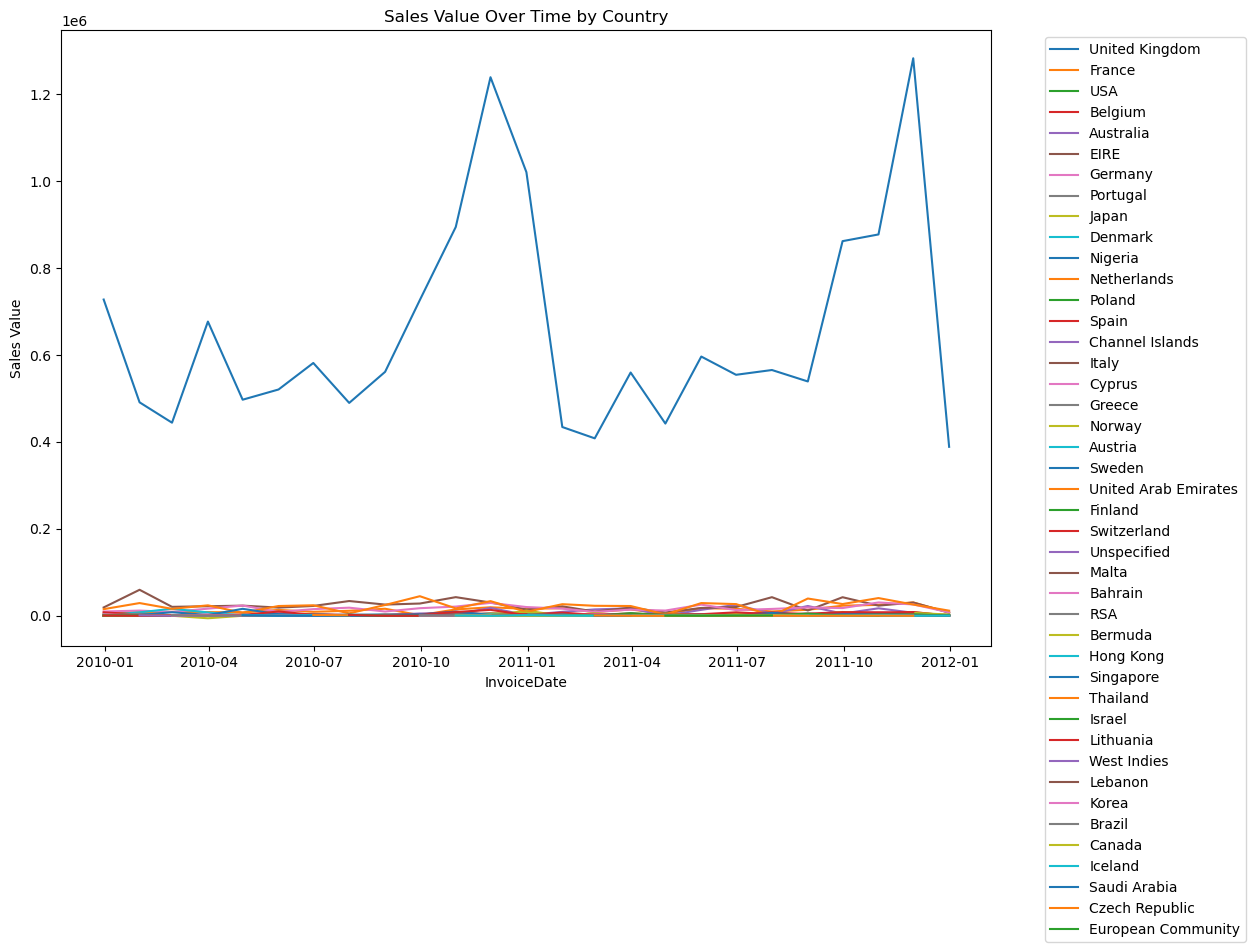

In [33]:
#question 3 Sales value over time by country
# Calculate total sales for each order（Quantity * Price）
df['Sales'] = df['Quantity'] * df['Price']

# Iterate over each country one by one and plot the time series graph
unique_countries = df['Country'].unique()


fig, ax = plt.subplots(figsize=(12, 8))

for country in unique_countries:
    country_data = df[df['Country'] == country].groupby(pd.Grouper(key='InvoiceDate', freq='M'))['Sales'].sum()
    ax.plot(country_data.index, country_data.values, label=country)


ax.set_xlabel('InvoiceDate')
ax.set_ylabel('Sales Value')
ax.set_title('Sales Value Over Time by Country')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

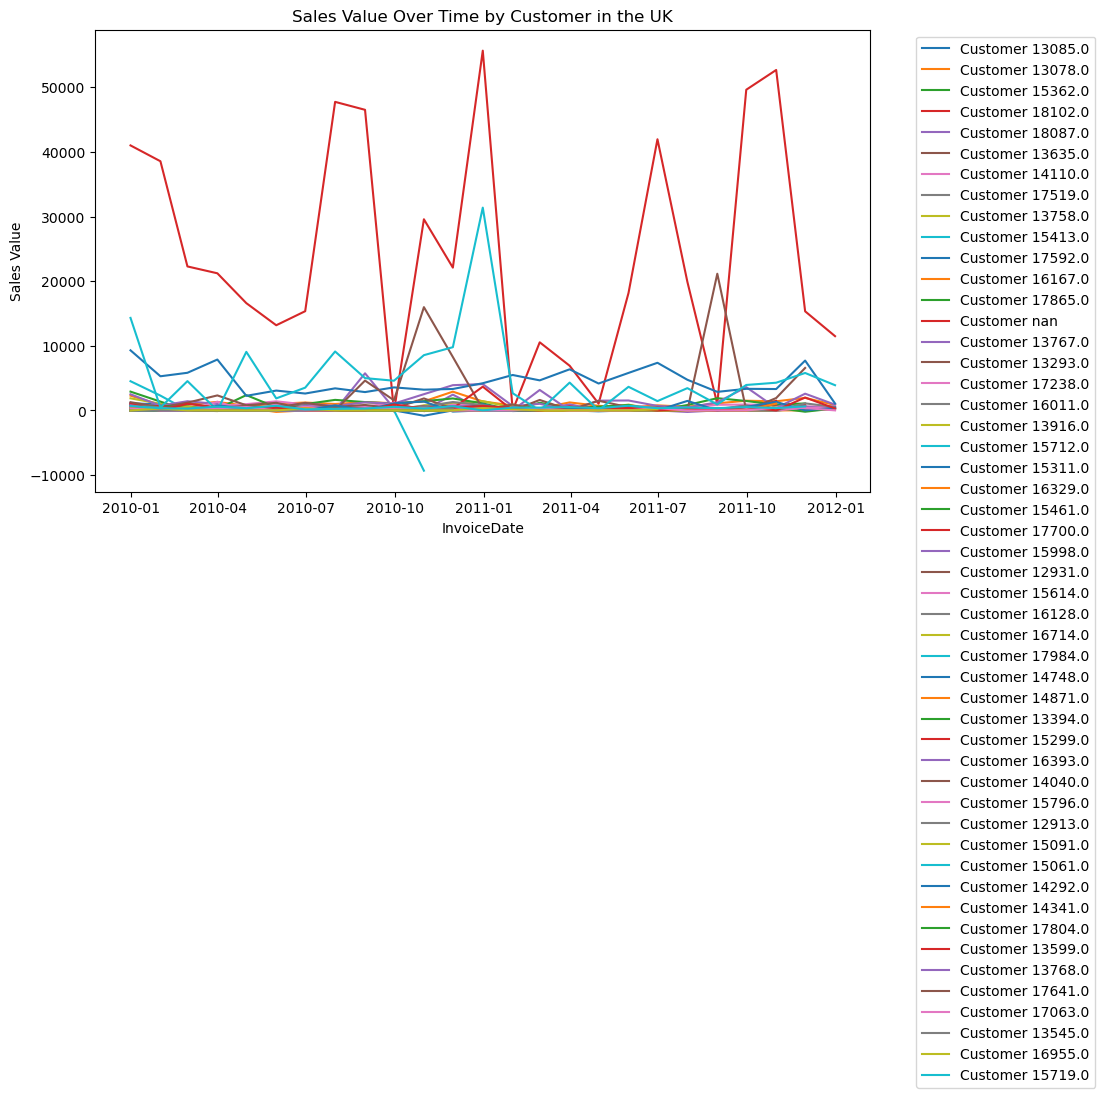

In [37]:
#question 4 total sales per customer in the UK
#（Quantity * Price）
df['Sales'] = df['Quantity'] * df['Price']

uk_data = df[df['Country'] == 'United Kingdom']

# Iterate over each country one by one and plot the time series graph
unique_customers = uk_data['Customer ID'].unique()[:50] #the data is too huge to plot so I only plot 50 customers

# Set a figure size
fig, ax = plt.subplots(figsize=(10, 6))

for customer in unique_customers:
    customer_data = uk_data[uk_data['Customer ID'] == customer].groupby(pd.Grouper(key='InvoiceDate', freq='M'))['Sales'].sum()
    ax.plot(customer_data.index, customer_data.values, label=f'Customer {customer}')

# Set plot labels and title
ax.set_xlabel('InvoiceDate')
ax.set_ylabel('Sales Value')
ax.set_title('Sales Value Over Time by Customer in the UK')
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # loc legend

plt.show()


In [43]:
#question 5 the top 5 products in each country
# Calculate the total sales of each product in each country
country_product_sales = df.groupby(['Country', 'Description'])['Quantity'].sum().reset_index()

# Calculate the sales proportion of each product in each country
country_product_sales['SalesPercentage'] = country_product_sales.groupby('Country')['Quantity'].transform(lambda x: x / x.sum() * 100)

# Find the top 5 products in each country
top5_products_by_country = country_product_sales.groupby('Country').apply(lambda x: x.nlargest(5, 'Quantity')).reset_index(drop=True)


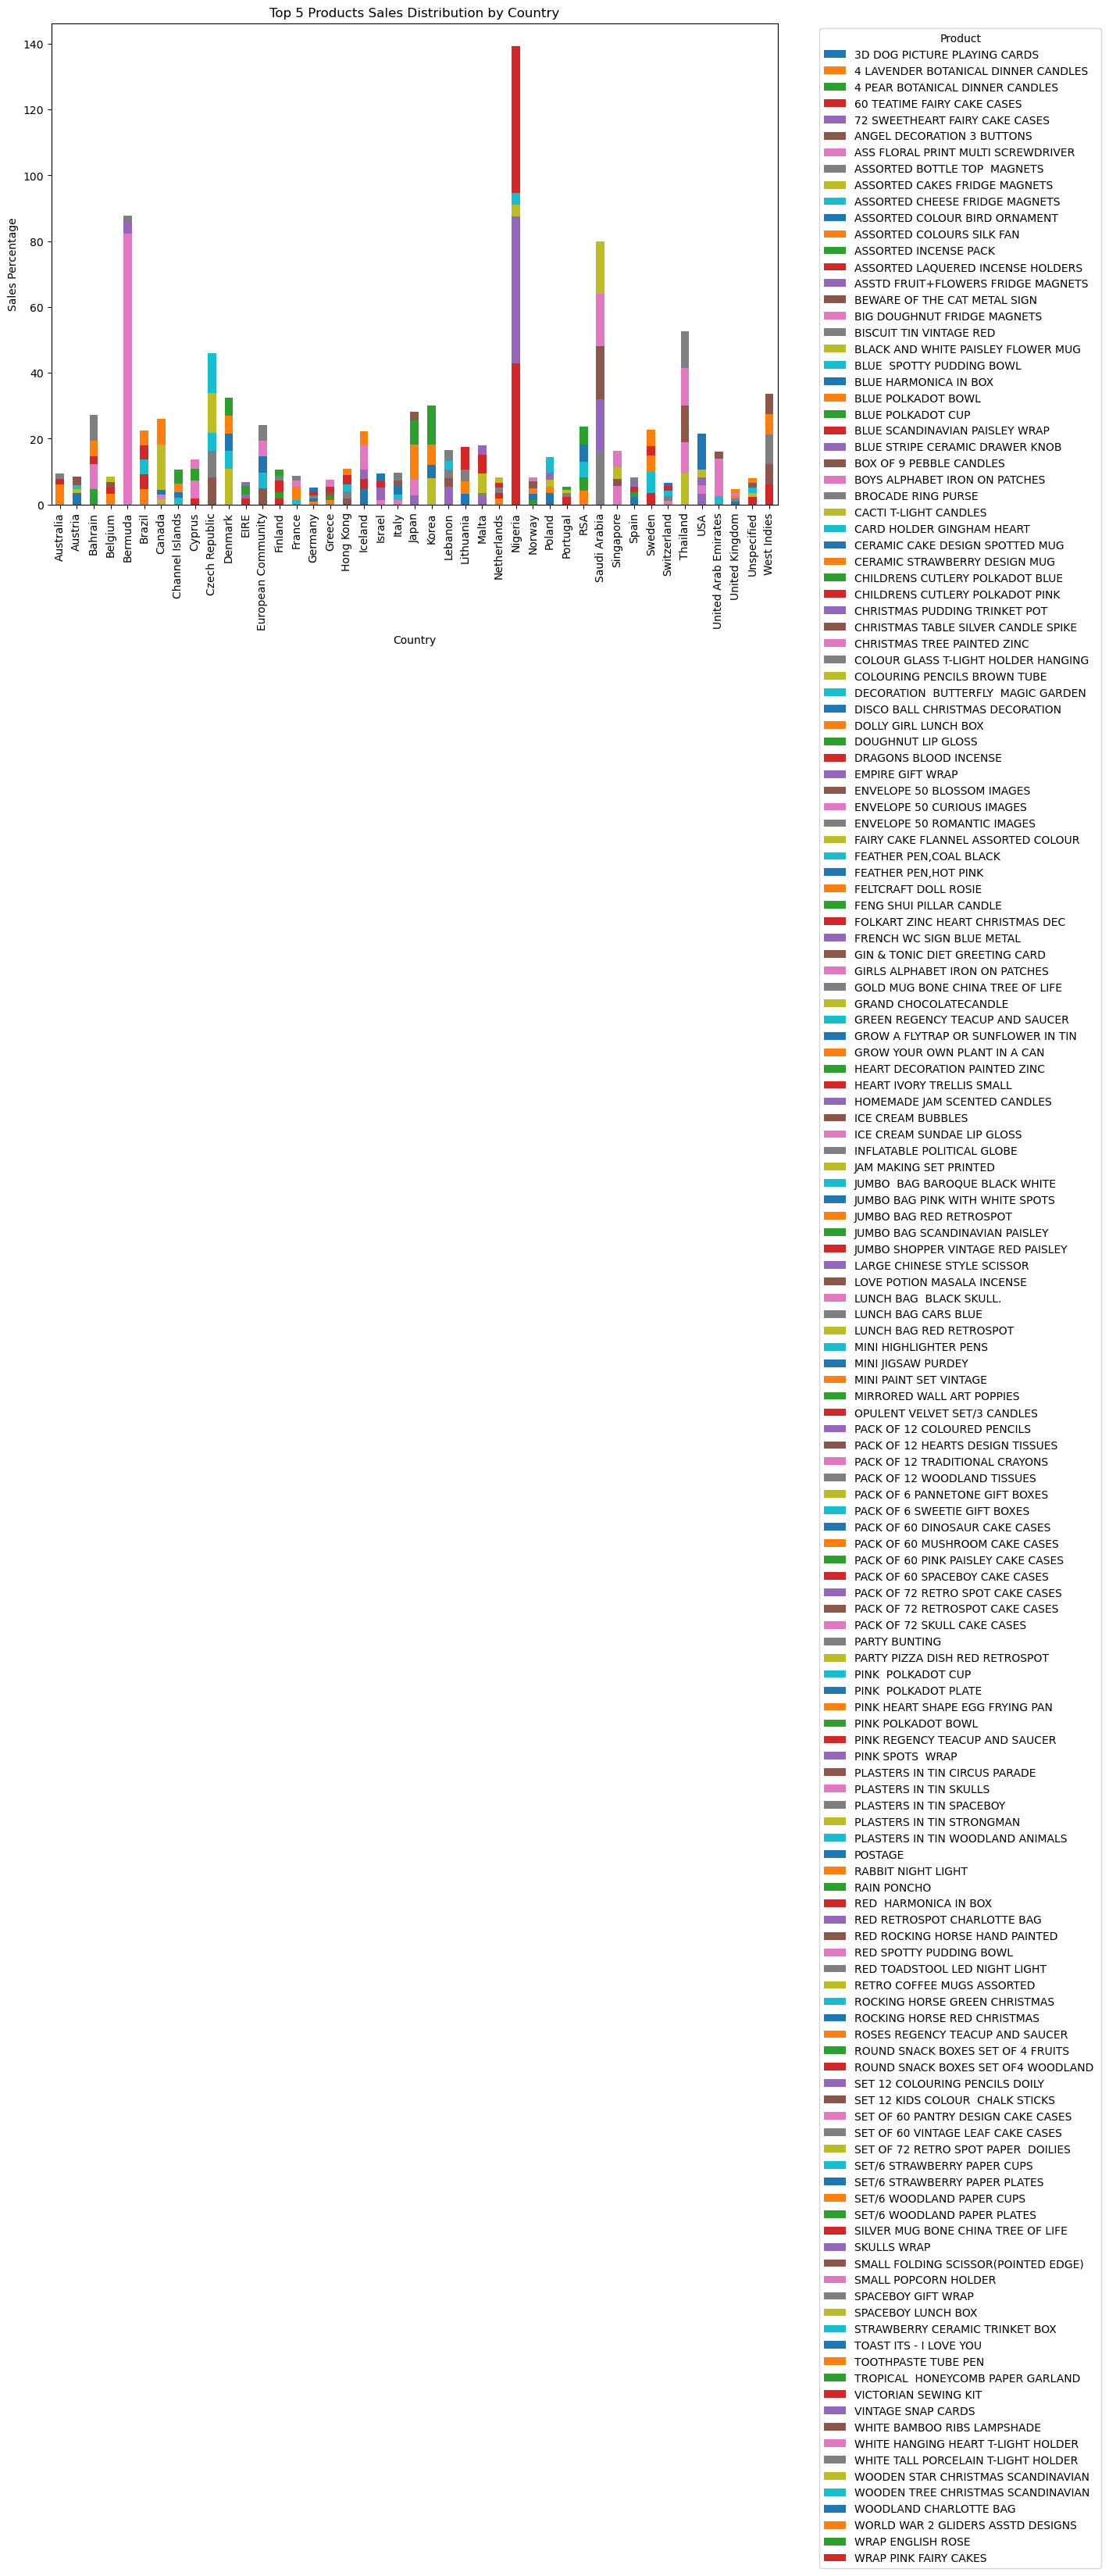

In [44]:
# Use a stacked bar chart to display the sales proportion of the top 5 products in each country
fig, ax = plt.subplots(figsize=(12, 8))
top5_products_by_country.pivot(index='Country', columns='Description', values='SalesPercentage').plot(kind='bar', stacked=True, ax=ax)
plt.title('Top 5 Products Sales Distribution by Country')
plt.xlabel('Country')
plt.ylabel('Sales Percentage')
plt.legend(title='Product', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()